[View in Colaboratory](https://colab.research.google.com/github/toanchitran/tensorflow/blob/master/tensorflow_hello_world.ipynb)

In [0]:
import tensorflow as tf

In [0]:
a = tf.constant([2])
b = tf.constant([3])

In [0]:
c = tf.add(a, b)

In [0]:
session = tf.Session()

In [5]:
result = session.run(c)
print(result)

[5]


In [6]:
Scalar = tf.constant([2])
Vector = tf.constant([5,6,2])
Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
Tensor = tf.constant([ [[1,2,3],[2,3,4],[3,4,5]], [[4,5,6],[5,6,7],[6,7,8]], [[7,8,9],[8,9,10],[9,10,11]] ])
with tf.Session() as session:
  result = session.run(Scalar)
  print ("Scalar (1 entry):\n %s \n" % result)
  result = session.run(Vector)
  print ("Vector (3 entries) :\n %s \n" % result)
  result = session.run(Matrix)
  print ("Matrix (3x3 entries):\n %s \n" % result)
  result = session.run(Tensor)
  print ("Tensor (3x3x3 entries) :\n %s \n" % result)

Scalar (1 entry):
 [2] 

Vector (3 entries) :
 [5 6 2] 

Matrix (3x3 entries):
 [[1 2 3]
 [2 3 4]
 [3 4 5]] 

Tensor (3x3x3 entries) :
 [[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]] 



In [18]:
Matrix_one = tf.constant([[1,2,3], [2,3,4], [3,4,5]])
Matrix_two = tf.constant([[2,2,2], [2,2,2], [2,2,2]])

first_operation = tf.add(Matrix_one, Matrix_two)
second_operation = Matrix_one + Matrix_two
third_operation = tf.matmul(Matrix_one, Matrix_two)
f_operation = tf.tensordot(Matrix_one, Matrix_two, axes=[[1],[0]])

with tf.Session() as session:
    result = session.run(first_operation)
    print ("Defined using tensorflow function :")
    print(result)
    result = session.run(second_operation)
    print ("Defined using normal expressions :")
    print(result)
    result = session.run(third_operation)
    print ("Defined using normal expressions :")
    print(result)
    result = session.run(f_operation)
    print ("Defined using normal expressions :")
    print(result)

Defined using tensorflow function :
[[3 4 5]
 [4 5 6]
 [5 6 7]]
Defined using normal expressions :
[[3 4 5]
 [4 5 6]
 [5 6 7]]
Defined using normal expressions :
[[12 12 12]
 [18 18 18]
 [24 24 24]]
Defined using normal expressions :
[[12 12 12]
 [18 18 18]
 [24 24 24]]


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

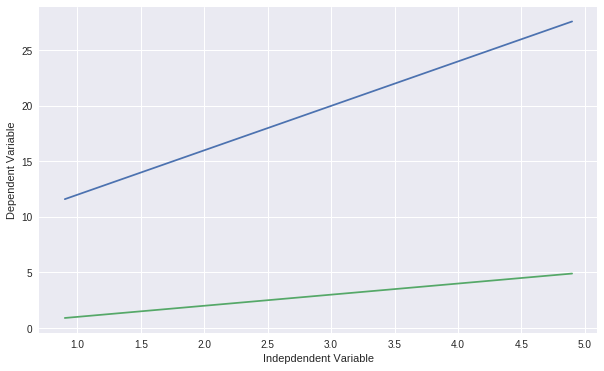

In [23]:
X = np.arange(0.9, 5.0, 0.1)
a=4
b=8

Y= a*X + b
Y_2 = 1*X + 0

plt.plot(X,Y)
plt.plot(X, Y_2)
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [0]:
## Linear regression with Tensorflow

x_data = np.random.rand(100).astype(np.float32)

y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [30]:
train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 5 == 0:
        print(step, evals)
        train_data.append(evals)

0 [2.5773954, 2.9974167]
5 [2.455899, 2.2768734]
10 [2.6063836, 2.196722]
15 [2.7148106, 2.138095]
20 [2.7932, 2.0957108]
25 [2.8498726, 2.0650687]
30 [2.890845, 2.0429153]
35 [2.9204667, 2.0268993]
40 [2.941882, 2.0153203]
45 [2.9573643, 2.0069492]
50 [2.9685576, 2.000897]
55 [2.97665, 1.9965216]
60 [2.9825003, 1.9933584]
65 [2.98673, 1.9910715]
70 [2.989788, 1.9894181]
75 [2.991999, 1.9882226]
80 [2.9935973, 1.9873585]
85 [2.994753, 1.9867337]
90 [2.9955883, 1.9862819]
95 [2.9961922, 1.9859554]


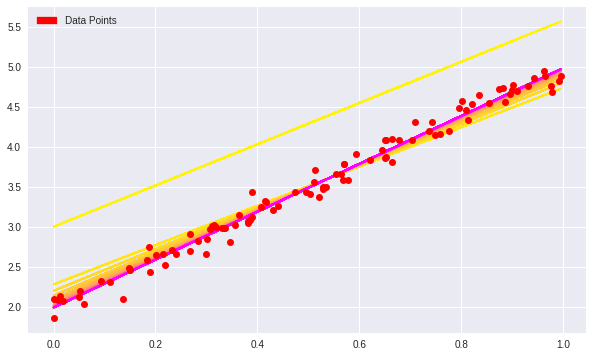

In [31]:
converter = plt.colors
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(x_data, y_data, 'ro')


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])

plt.show()